# Ford GoBike System
## by Jayanth



> Ford GoBike is the Bay Area's bike share system.Bay Wheels is a regional public bicycle sharing system in the San Francisco Bay Area, California. Beginning operation in August 2013 as Bay Area Bike Share, the Bay Wheels system currently has over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. On June 28, 2017, the system officially re-launched as Ford GoBike in a partnership with Ford Motor Company. After Motivate's acquisition by Lyft, the system was subsequently renamed to Bay Wheels in June 2019. The system is expected to expand to 7,000 bicycles around 540 stations in San Francisco, Oakland, Berkeley, Emeryville, and San Jose. The system is operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States.

> As of January 2018, the system had seen nearly 500,000 rides since the launch in 2017 and had about 10,000 annual subscribers.(source:wiki)

# wrangling

>Wrangling process mainly consists of three steps. they are gather , assess and clean. the data was gathered from the fordgo bike website. Visual assessment and programmatic assessment were done. as a part of the assessment process many things were observed. Those things were taken care of in the cleaning part of the wrangling process 

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
%matplotlib inline

all the files which were in csv format were uploaded to the juypter notebook and combined to form a new and a single csv file to work with for this project

In [75]:
filenames=["2017-fordgobike-tripdata.csv" ,"201801-fordgobike-tripdata.csv" ,"201802-fordgobike-tripdata.csv" ,"201803-fordgobike-tripdata.csv" ,"201804-fordgobike-tripdata.csv", "201805-fordgobike-tripdata.csv" ,"201806-fordgobike-tripdata.csv" ,"201807-fordgobike-tripdata.csv" ,"201808-fordgobike-tripdata.csv", "201809-fordgobike-tripdata.csv" ,"201810-fordgobike-tripdata.csv", "201811-fordgobike-tripdata.csv", "201812-fordgobike-tripdata.csv" ,"201901-fordgobike-tripdata.csv", "201902-fordgobike-tripdata.csv", "201903-fordgobike-tripdata.csv", "201904-fordgobike-tripdata.csv" ,"201905-baywheels-tripdata.csv" ]

In [76]:
combined_csv = pd.concat( [ pd.read_csv(f) for f in filenames ] )

C:\Users\JAYANTH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [77]:
combined_csv.to_csv( "combined_csv.csv", index=False )

In [78]:
aa = pd.read_csv('combined_csv.csv')

In [79]:
aa.head(10)

bike_id bike_share_for_all_trip  duration_sec  end_station_id  \
0       96                     NaN         80110            43.0   
1       88                     NaN         78800            96.0   
2     1094                     NaN         45768           245.0   
3     2831                     NaN         62172             5.0   
4     3167                     NaN         43603           247.0   
5     1487                     NaN          9226            30.0   
6     3539                     NaN          4507           259.0   
7     1503                     NaN          4334           284.0   
8     3125                     NaN          4150            20.0   
9     2543                     NaN          4238            20.0   

   end_station_latitude  end_station_longitude  \
0             37.778768            -122.415929   
1             37.766210            -122.426614   
2             37.870348            -122.267764   
3             37.783899            -122.408445   
4             37.867789            -122.265896   
5             37.776598            -122.395282   
6             37.866249            -122.299371   
7             37.784872            -122.400876   
8             37.791300            -122.399051   
9             37.791300            -122.399051   

                                    end_station_name  \
0  San Francisco Public Library (Grove St at Hyde...   
1                              Dolores St at 15th St   
2                             Downtown Berkeley BART   
3       Powell St BART Station (Market St at 5th St)   
4                          Fulton St at Bancroft Way   
5     San Francisco Caltrain (Townsend St at 4th St)   
6                            Addison St at Fourth St   
7  Yerba Buena Center for the Arts (Howard St at ...   
8    Mechanics Monument Plaza (Market St at Bush St)   
9    Mechanics Monument Plaza (Market St at Bush St)   

                   end_time  member_birth_year member_gender  \
0  2018-01-01 15:12:50.2450             1987.0          Male   
1  2018-01-01 13:49:55.6170             1965.0        Female   
2  2018-01-01 11:28:36.8830                NaN           NaN   
3  2018-01-01 10:47:23.5310                NaN           NaN   
4  2018-01-01 02:29:57.5710             1997.0        Female   
5  2018-01-01 01:24:47.1660                NaN           NaN   
6  2018-01-01 01:04:35.6190             1991.0        Female   
7  2018-01-01 00:58:51.2110                NaN           NaN   
8  2018-01-01 00:46:18.3080                NaN           NaN   
9  2018-01-01 00:46:17.0530                NaN           NaN   

   start_station_id  start_station_latitude  start_station_longitude  \
0              74.0               37.776435              -122.426244   
1             284.0               37.784872              -122.400876   
2             245.0               37.870348              -122.267764   
3              60.0               37.774520              -122.409449   
4             239.0               37.868813              -122.258764   
5              30.0               37.776598              -122.395282   
6             259.0               37.866249              -122.299371   
7             284.0               37.784872              -122.400876   
8              20.0               37.791300              -122.399051   
9              20.0               37.791300              -122.399051   

                                  start_station_name  \
0                              Laguna St at Hayes St   
1  Yerba Buena Center for the Arts (Howard St at ...   
2                             Downtown Berkeley BART   
3                               8th St at Ringold St   
4                      Bancroft Way at Telegraph Ave   
5     San Francisco Caltrain (Townsend St at 4th St)   
6                            Addison St at Fourth St   
7  Yerba Buena Center for the Arts (Howard St at ...   
8    Mechanics Monument Plaza (Market St at Bush St)   
9    Mechanics Monument Plaz

In [80]:
aa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3436488 entries, 0 to 3436487
Data columns (total 16 columns):
bike_id                    int64
bike_share_for_all_trip    object
duration_sec               int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name           object
end_time                   object
member_birth_year          float64
member_gender              object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name         object
start_time                 object
user_type                  object
dtypes: float64(7), int64(2), object(7)
memory usage: 419.5+ MB


In [81]:
aa.duplicated().sum()

0

**drop columns which are not useful for analysis**

In [82]:
aa.drop(['end_station_latitude','end_station_longitude','start_station_latitude','start_station_longitude'],axis=1,inplace=True)

In [83]:
aa_dup = aa.copy()

In [84]:
aa_dup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3436488 entries, 0 to 3436487
Data columns (total 12 columns):
bike_id                    int64
bike_share_for_all_trip    object
duration_sec               int64
end_station_id             float64
end_station_name           object
end_time                   object
member_birth_year          float64
member_gender              object
start_station_id           float64
start_station_name         object
start_time                 object
user_type                  object
dtypes: float64(3), int64(2), object(7)
memory usage: 314.6+ MB


**setting correct data types for all the columns**

In [85]:
aa_dup.end_time = pd.to_datetime(aa_dup.end_time)

In [86]:
aa_dup.start_time = pd.to_datetime(aa_dup.start_time)

In [87]:
aa_dup.user_type = aa_dup.user_type.astype('category')

In [88]:
aa_dup.member_gender = aa_dup.member_gender.astype('category')

In [89]:
aa_dup['month_num'] = aa_dup['start_time'].dt.month.astype(int)

In [90]:
aa_dup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3436488 entries, 0 to 3436487
Data columns (total 13 columns):
bike_id                    int64
bike_share_for_all_trip    object
duration_sec               int64
end_station_id             float64
end_station_name           object
end_time                   datetime64[ns]
member_birth_year          float64
member_gender              category
start_station_id           float64
start_station_name         object
start_time                 datetime64[ns]
user_type                  category
month_num                  int32
dtypes: category(2), datetime64[ns](2), float64(3), int32(1), int64(2), object(3)
memory usage: 281.8+ MB


**calcualting the age of the members**

In [91]:
aa_dup['member_age'] = 2019 - aa_dup['member_birth_year']

In [92]:
aa_dup.sample(5)

bike_id bike_share_for_all_trip  duration_sec  end_station_id  \
90258       2720                     NaN           434            45.0   
1338468     2123                      No           485             8.0   
2412698     5227                      No           907            21.0   
3171301     4717                      No           786           100.0   
1903644     4411                      No           243            88.0   

                                         end_station_name  \
90258                                 5th St at Howard St   
1338468                     The Embarcadero at Vallejo St   
2412698  Montgomery St BART Station (Market St at 2nd St)   
3171301                              Bryant St at 15th St   
1903644                              11th St at Bryant St   

                       end_time  member_birth_year member_gender  \
90258   2017-11-30 08:27:21.530             1982.0        Female   
1338468 2018-06-01 07:39:07.423             1971.0          Male   
2412698 2019-01-28 19:39:46.162             1991.0          Male   
3171301 2019-04-09 17:42:09.039             1982.0          Male   
1903644 2018-09-04 11:16:39.798             1980.0          Male   

         start_station_id            start_station_name  \
90258                22.0         Howard St at Beale St   
1338468              28.0  The Embarcadero at Bryant St   
2412698             355.0       23rd St at Tennessee St   
3171301             343.0           Bryant St at 2nd St   
1903644             112.0        Harrison St at 17th St   

                     start_time   user_type  month_num  member_age  
90258   2017-11-30 08:20:06.911  Subscriber         11        37.0  
1338468 2018-06-01 07:31:01.794  Subscriber          6        48.0  
2412698 2019-01-28 19:24:38.440  Subscriber          1        28.0  
3171301 2019-04-09 17:29:02.462  Subscriber          4        37.0  
1903644 2018-09-04 11:12:36.247  Subscriber          9        39.0

**creating seperate columns for month,day,weekday,hour using the start_time column**

In [93]:
aa_dup['month']=aa_dup['start_time'].dt.strftime('%B')

In [94]:
aa_dup['day']=aa_dup['start_time'].dt.day.astype(int)

In [95]:
aa_dup['weekday']=aa_dup['start_time'].dt.strftime('%a')

In [96]:
aa_dup['hour']=aa_dup['start_time'].dt.hour

In [97]:
aa_dup['endhour']=aa_dup['end_time'].dt.hour

In [98]:
aa_dup['duration_min'] = aa_dup['duration_sec']/60 

In [99]:
aa_dup['duration_min']= aa_dup['duration_min'].astype(int)

In [100]:
aa_dup.dropna(axis=0)

bike_id bike_share_for_all_trip  duration_sec  end_station_id  \
519700      2765                      No         75284           285.0   
519702      3039                      No         71576           296.0   
519704       617                      No         39966            19.0   
519706      3571                      No           453           134.0   
519707      1403                      No           180            93.0   
519708      3675                     Yes           996             4.0   
519709      1453                     Yes           825           317.0   
519711      2928                      No           432            43.0   
519712      3016                      No           601            86.0   
519713        55                     Yes           887           297.0   
519714      2602                      No           210           186.0   
519715      2556                      No           188            76.0   
519716      3041                     Yes           808            98.0   
519717       546                      No           378            78.0   
519719      1886                      No           686           317.0   
519720      3583                      No           450           157.0   
519721      2144                      No           294           244.0   
519722      3468                     Yes           150           183.0   
519723      1432                     Yes           462           134.0   
519724       997                      No           379           189.0   
519725      3725                      No           880           145.0   
519726      1059                      No          1210           133.0   
519727      1208                      No           259           266.0   
519728      1834                      No           592           195.0   
519729      1248                      No          1059            79.0   
519730      3401                      No           375             6.0   
519731      3224                      No           300            93.0   
519732      1757                      No          2219            81.0   
519733      3379                      No           330           124.0   
519734      1503                      No           870           106.0   
...          ...                     ...           ...             ...   
3436455     2560                      No           133           269.0   
3436456     3262                     Yes          1384           187.0   
3436457     2669                      No           235           141.0   
3436458     2175                     Yes          2285           324.0   
3436459     1832                     Yes          2206           324.0   
3436460     3479                      No           916           386.0   
3436461     2631                      No           230            44.0   
3436462     2073                      No           426            60.0   
3436463     2705                      No          1166           189.0   
3436464     1936                      No           575            27.0   
3436465      877                      No           535            36.0   
3436466     2638                      No           618            27.0   
3436467      845                      No           917            33.0   
3436468     2560                     Yes           204           240.0   
3436469     2738                      No          1810           377.0   
3436470     2576                      No           897            76.0   
3436471     3637                      No           399            49.0   
3436472      342                      No           641           207.0   
3436473     1086                      No           199            88.0   
3436474      789                      No           774            31.0   
3436475     2185                     Yes           537           223.0   
3436476     2560                     Yes           129           239.0   
3436478     2

In [101]:
aa_dup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3436488 entries, 0 to 3436487
Data columns (total 20 columns):
bike_id                    int64
bike_share_for_all_trip    object
duration_sec               int64
end_station_id             float64
end_station_name           object
end_time                   datetime64[ns]
member_birth_year          float64
member_gender              category
start_station_id           float64
start_station_name         object
start_time                 datetime64[ns]
user_type                  category
month_num                  int32
member_age                 float64
month                      object
day                        int32
weekday                    object
hour                       int64
endhour                    int64
duration_min               int32
dtypes: category(2), datetime64[ns](2), float64(4), int32(3), int64(4), object(5)
memory usage: 439.2+ MB


**copying the cleaned csv file to another csv file** 

In [102]:
aa_dup.to_csv('aa_clean.csv', index = False)

In [72]:
aa1 = pd.read_csv('aa_clean.csv')

In [73]:
aa1.head(5)

bike_id bike_share_for_all_trip  duration_sec  end_station_id  \
0       96                     NaN         80110            43.0   
1       88                     NaN         78800            96.0   
2     3167                     NaN         43603           247.0   
3     3539                     NaN          4507           259.0   
4     2311                     NaN          2183            24.0   

                                    end_station_name                 end_time  \
0  San Francisco Public Library (Grove St at Hyde...  2018-01-01 15:12:50.245   
1                              Dolores St at 15th St  2018-01-01 13:49:55.617   
2                          Fulton St at Bancroft Way  2018-01-01 02:29:57.571   
3                            Addison St at Fourth St  2018-01-01 01:04:35.619   
4                              Spear St at Folsom St  2018-01-01 00:29:18.743   

   member_birth_year member_gender  start_station_id  \
0             1987.0          Male              74.0   
1             1965.0        Female             284.0   
2             1997.0        Female             239.0   
3             1991.0        Female             259.0   
4             1990.0          Male              67.0   

                                  start_station_name               start_time  \
0                              Laguna St at Hayes St  2017-12-31 16:57:39.654   
1  Yerba Buena Center for the Arts (Howard St at ...  2017-12-31 15:56:34.842   
2                      Bancroft Way at Telegraph Ave  2017-12-31 14:23:14.001   
3                            Addison St at Fourth St  2017-12-31 23:49:28.422   
4  San Francisco Caltrain Station 2  (Townsend St...  2017-12-31 23:52:55.581   

    user_type  month_num  member_age     month  day weekday  hour  endhour  \
0    Customer         12        32.0  December   31     Sun    16       15   
1    Customer         12        54.0  December   31     Sun    15       13   
2  Subscriber         12        22.0  December   31     Sun    14        2   
3    Customer         12        28.0  December   31     Sun    23        1   
4  Subscriber         12        29.0  December   31     Sun    23        0   

   duration_min  
0          1335  
1          1313  
2           726  
3            75  
4            36

**considering only people of age 60  for the analysis**

In [32]:
aa_dup = aa_dup.query('member_age <= 60')

In [33]:
aa_dup.member_age.mean()

34.986068320234

mean age is around 34 

# What is the structure of your dataset?

>the data set contains 
>>bike_id
>>bike_share_for_all_trip
>>duration_sec
>>end_station_id
>>end_station_latitude
>>end_station_longitude
>>end_station_name
>>end_time
>>member_birth_year
>>member_gender
>>start_station_id
>>start_station_latitude
>>start_station_longitude
>>start_station_name
>>start_time
>>user_type

# What is/are the main feature(s) of interest in your dataset?

>Figuring out which stations have a high number of rate of flow of bikes.Also,figuring out when and where bikes are high in demand (during the day/weekday/month). Also to know which age range and gender uses the service the most and if the service is mostly used by customers or subscribers.

# What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>the main features in the dataset which will help provide better understanding with data analysis process are 
>>bike_id
>>bike_share_for_all_trip
>>duration_sec
>>end_station_id
>>end_time
>>member_birth_year
>>member_gender
>>start_station_id
>>start_time
>>user_type

# Exploration

**ploting a histogram for seeing Monthly usage of the fordgo bikes**

<Figure size 1058.4x595.44 with 0 Axes>

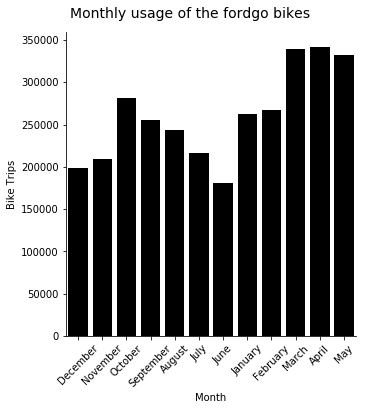

In [36]:
plt.figure(figsize=(14.70, 8.27))
g = sb.catplot(data=aa_dup, x='month', kind='count',color='black' )
g.set_axis_labels("Month", "Bike Trips")
g.fig.suptitle('Monthly usage of the fordgo bikes', y=1.03, fontsize=14)
g.set_xticklabels(rotation=45);

From the above graph ot can be observed that the months of march april and may have the highest usage of bikes and the month of june has the lowest usage when compared to all the other months

**calculating percentage of the different user types and presenting a graph**

In [34]:
aa_dup['user_type'].nunique()

2

In [35]:
aa_dup['user_type'].value_counts()

Subscriber    2767984
Customer       360928
Name: user_type, dtype: int64

In [36]:
#number of subscribers
qq=2767984

In [37]:
#number of customer
ww=360928

In [38]:
# total number of user taken from the given data
ee=len(aa_dup['user_type'])

In [39]:
percentage_of_subscribers=(qq/ee)*100
print(percentage_of_subscribers)

88.46474429450237


In [40]:
percentage_of_customers=(ww/ee)*100
print(percentage_of_customers)

11.53525570549763


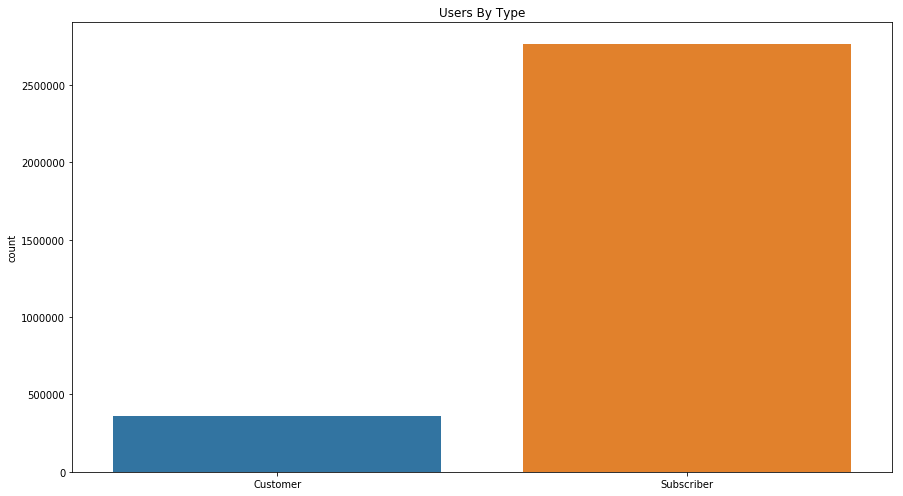

In [37]:
fig, ax = plt.subplots(figsize = (14.70, 8.27))
sb.countplot(x = "user_type", data = aa_dup, lw = 0.5)
plt.title("Users By Type");
plt.xlabel("");

from the above given data, it can be seen that users of fordgo bike include more number of subscriber (88.46 percent) than the customers(11.54 percent). it can be assumed that more number of people are subscribing to the service as it more convienent and easy to use as this bike system is their main part of their transport in the day to day lifes 

**ploting a graph to show Relative frequency of bike trips per day**

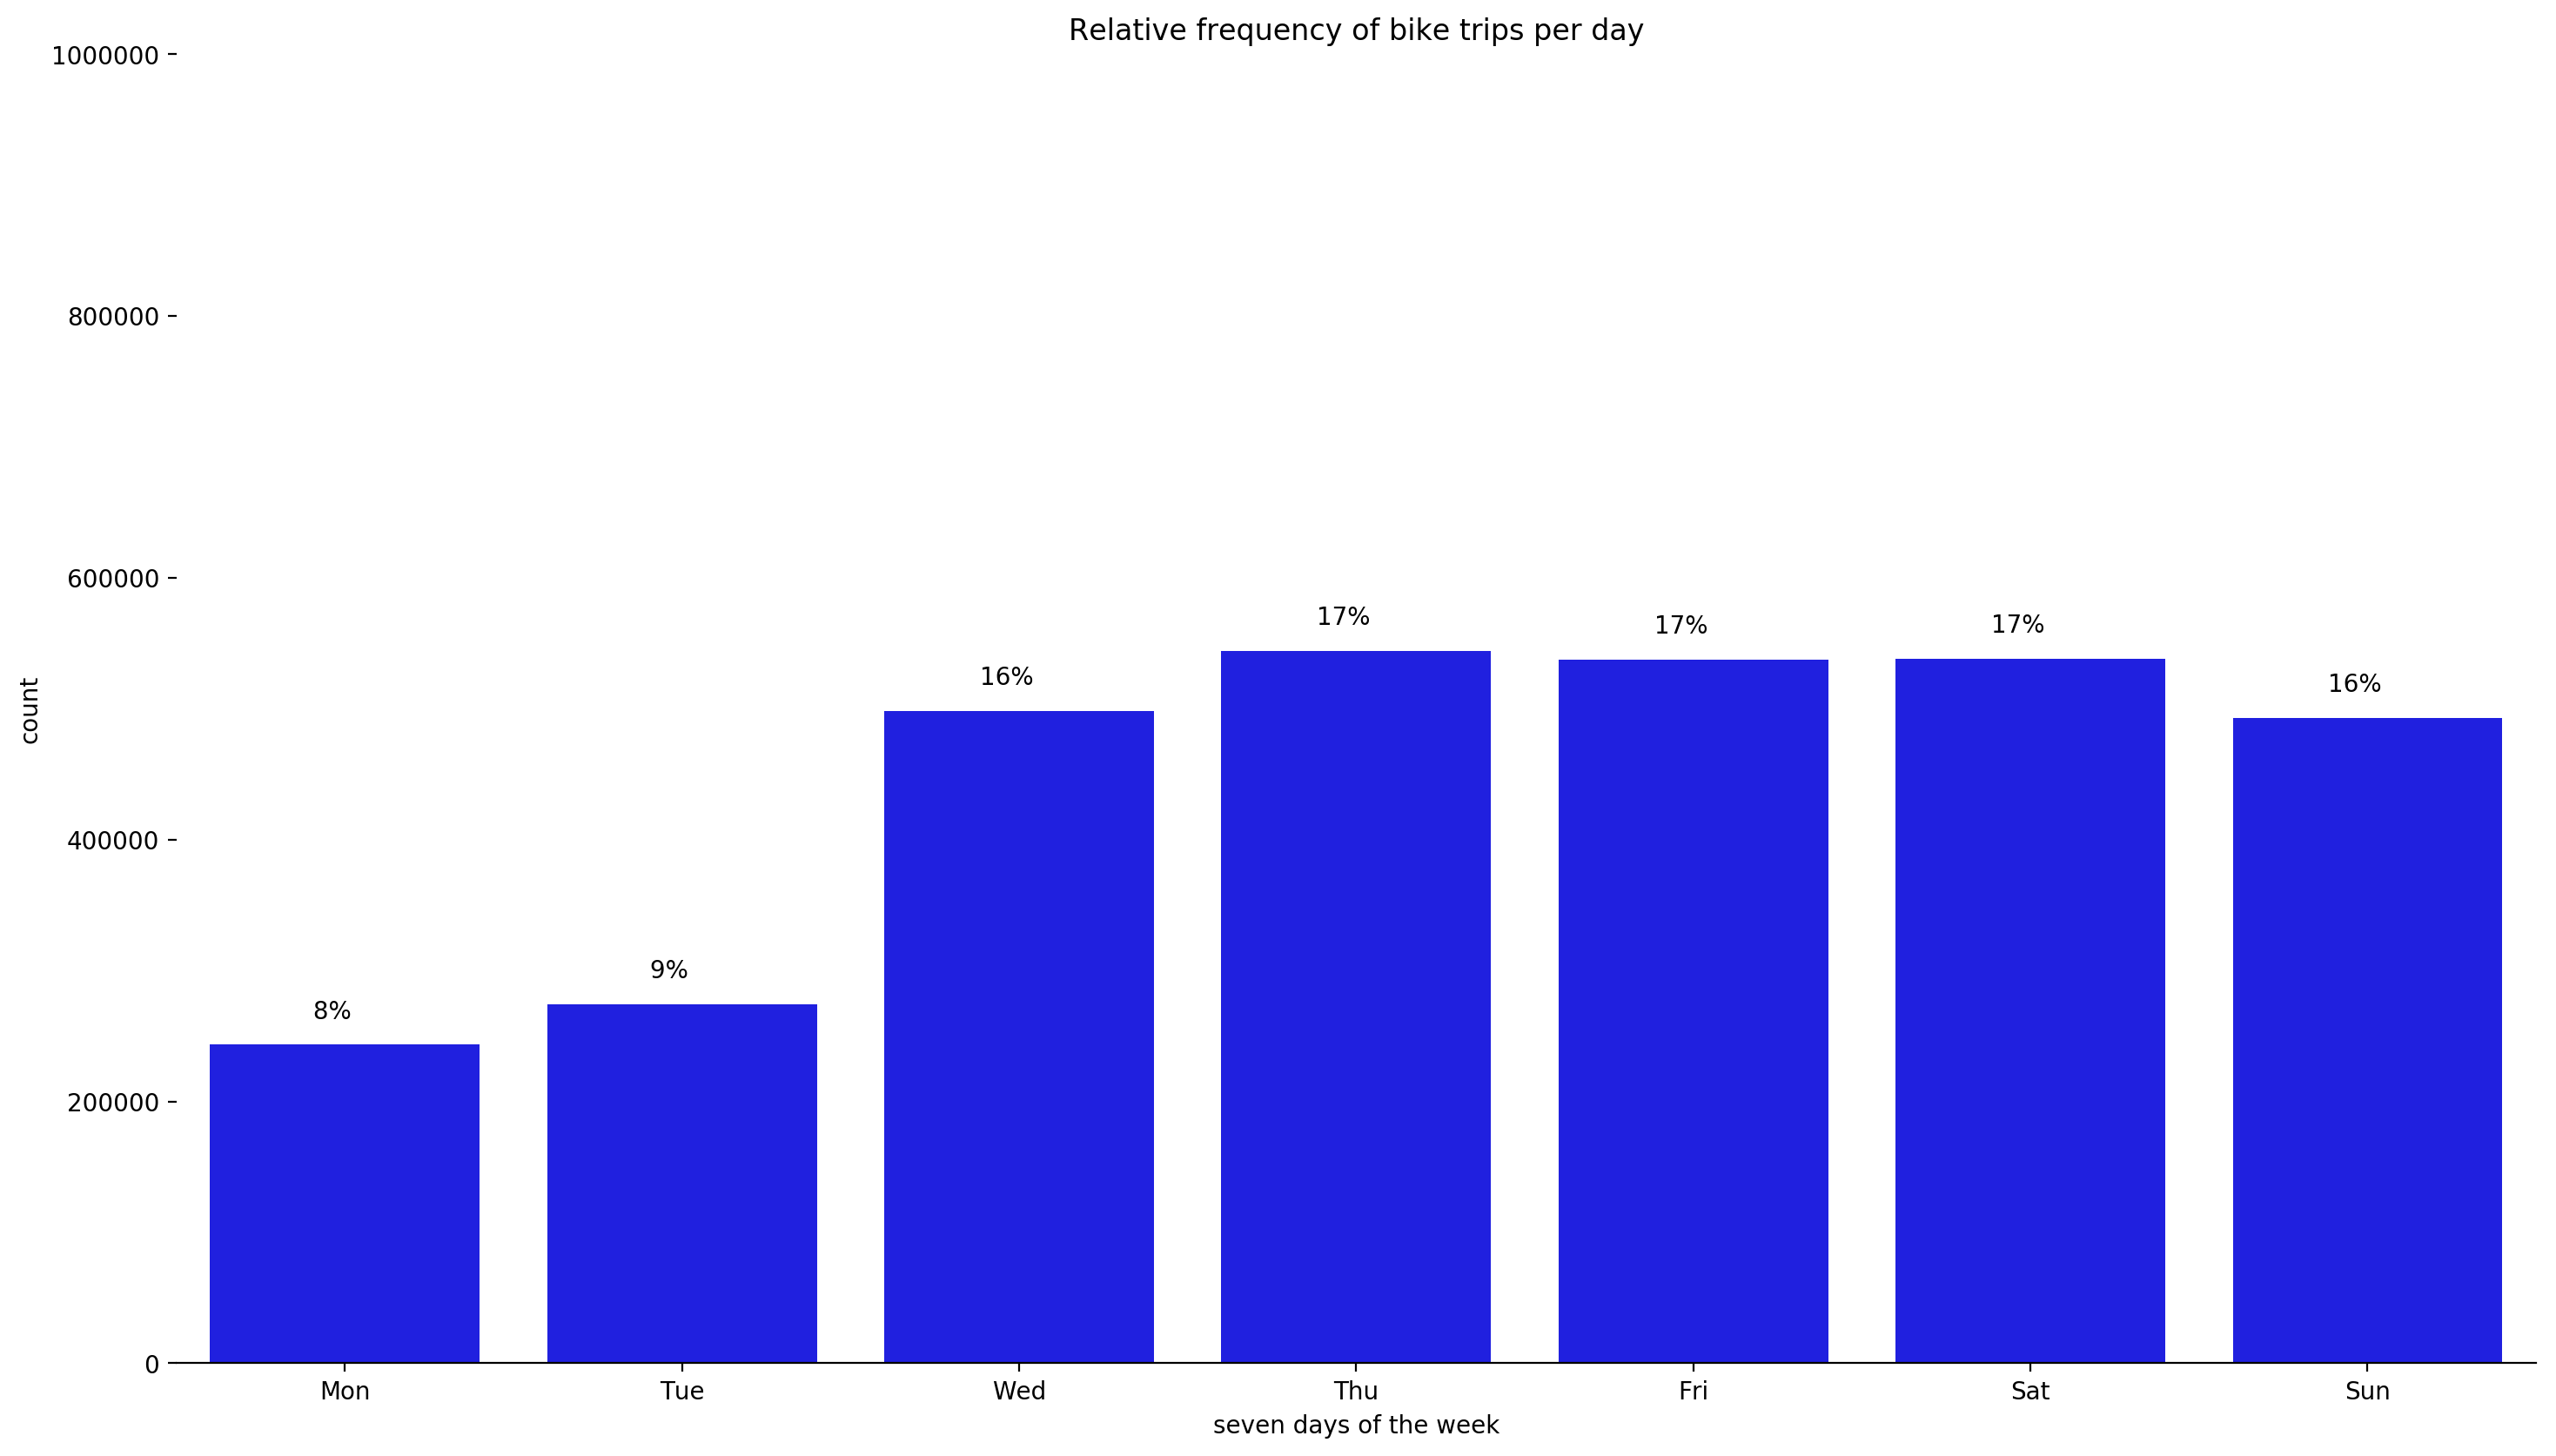

In [38]:
fig, ax = plt.subplots(figsize = (14.70, 8.27),dpi=200)
sb.countplot(x = "weekday", data = aa_dup, color = "blue");
plt.tight_layout()
c_axes = plt.gca()
c_axes.axes.get_yaxis().set_visible(True)
sb.despine(fig, left = True)
plt.title("Relative frequency of bike trips per day")
ax.set(xticklabels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]);
plt.xlabel("seven days of the week")
plt.ylim(0,1000000)
for p in ax.patches:
    ax.annotate('{:10.0f}%'.format(p.get_height()/len(aa_dup)*100), (p.get_x()+0.1, p.get_height()+20000))

from the above graph,the relative frequncy of bike trips per day are high on thursday,friday and saturday and the lowest on monday

**ploting a graph to show Ford GoBike System Usage by end Hour**

<Figure size 1058.4x595.44 with 0 Axes>

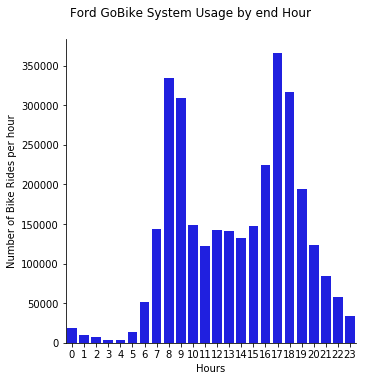

In [39]:
plt.figure(figsize=(14.70, 8.27))
graph = sb.catplot(data = aa_dup, x='endhour', kind='count',color='blue')
graph.set_axis_labels('Hours', 'Number of Bike Rides per hour')
graph.fig.suptitle('Ford GoBike System Usage by end Hour', y=1.05);

from the above graph it is observed that the return of the bikes is very high between 8 am and 9 am and also the return is very high between 5 pm and 6 pm .so it can be assumed that the people who are working in the late night shift are also using the bike system along with the people working in the other shifts

**ploting a graph to show Ford GoBike System Usage by start Hour**

<Figure size 1058.4x595.44 with 0 Axes>

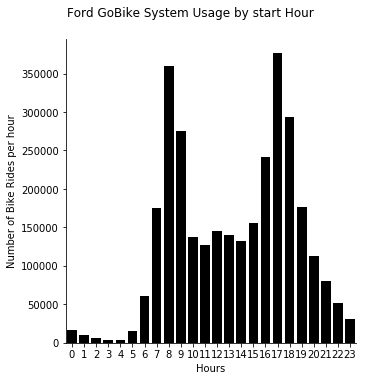

In [40]:
plt.figure(figsize=(14.70, 8.27))
graph = sb.catplot(data = aa_dup, x='hour', kind='count',color='black')
graph.set_axis_labels('Hours', 'Number of Bike Rides per hour')
graph.fig.suptitle('Ford GoBike System Usage by start Hour', y=1.05);

from the above graph it can be observed that the bikes taken i very high between 8 am and 9 am and also it is very high between 5 pm an 6pm .so it can be assumed that the people who are working in the late night shift are also using the bike system along with the people working in the other shifts. it indicates that the fordgo bike system is a 24/7 working organisation which is one of the factors that has helped the growth of the of the organisation 

**ploting a graph to show distribution of gender in users**

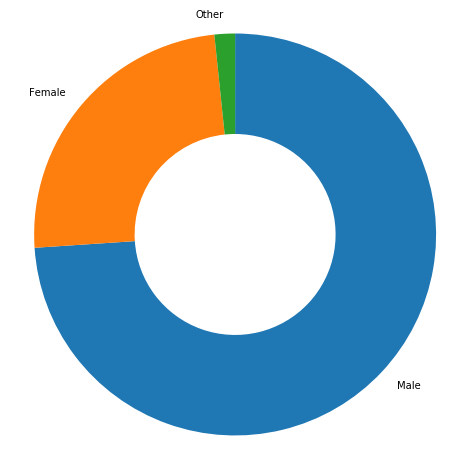

In [41]:
plt.figure(figsize=(14.70, 8.27))
sorted_counts = aa_dup['member_gender'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,counterclock = False,radius=100,wedgeprops = {'width' : 50})
plt.title("distribution of gender in users")
plt.axis('square');

from the above pie chart it can be observed that the usage of the bike is done more by males when compared to females and others 

**ploting a graph to show the trip duration(sec) for the bike rides**

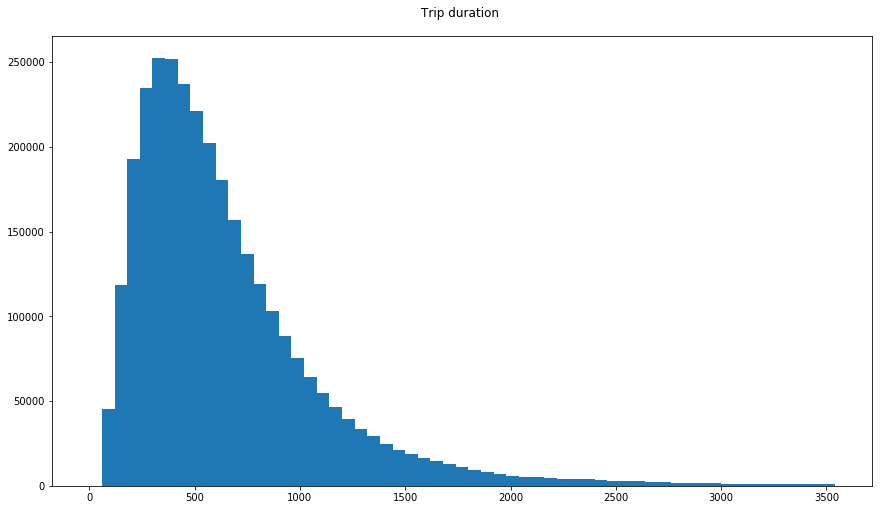

In [43]:
plt.figure(figsize=(14.70, 8.27))
bin_edges = np.arange(0, 3600,60)
plt.hist(data = aa_dup, x = 'duration_sec', bins = bin_edges)
plt.title("Trip duration ", y=1.03);

from the above graph it can be observed that the usage of bikes is mostly between 10 to 20 minutes which means that the bikes are most used by people for their daily commute and to go to the places they vist everyday and spend most of their time 

**scatter plot to show the vist to start and end stations**

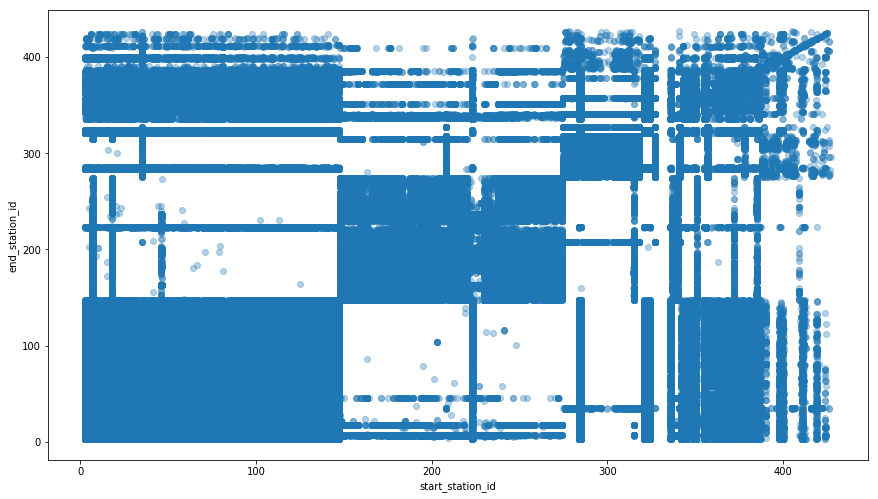

In [44]:
plt.figure(figsize=(14.70, 8.27))
sb.regplot(data = aa_dup, x = 'start_station_id', y = 'end_station_id', fit_reg = False,x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/3});

form the above graph it can be observed that only some of the station among the provided station has a huge amount of traffic of people visting which also confirms the assumption about the duration 

**graph to show Monthly usage of the fordgo bike share system per user type**

<Figure size 1058.4x595.44 with 0 Axes>

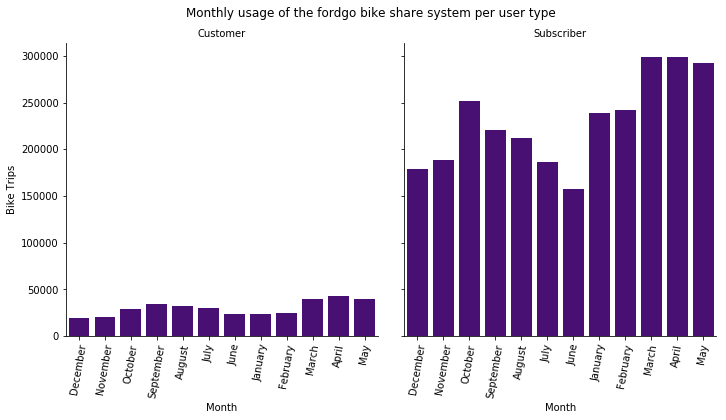

In [45]:
plt.figure(figsize=(14.70, 8.27))
g = sb.catplot(data=aa_dup, x='month', col="user_type", kind='count',color = "indigo")
g.set_axis_labels("Month", "Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Monthly usage of the fordgo bike share system per user type', y=1.03)
g.set_xticklabels(rotation=80);

from the above graph it can be observed that the Monthly usage of the bike system of both the customer and the subscriber are high in march april and may.but as of the low usage the subscribers use the bike system less in june where as the customers use it less in the month december and november

**graph to show Weekly usage of the fordgo bike share system per user type**

<Figure size 1058.4x595.44 with 0 Axes>

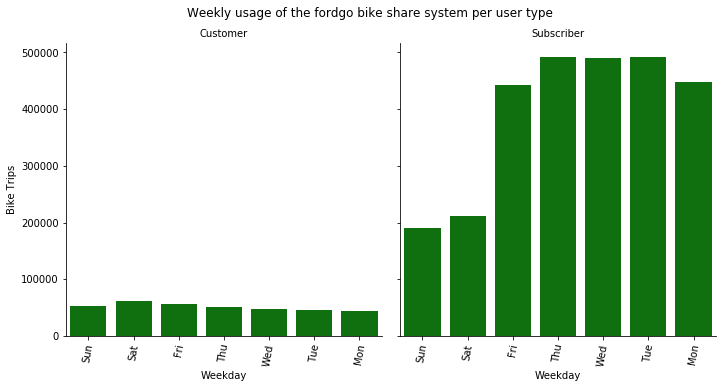

In [46]:
plt.figure(figsize=(14.70, 8.27))
g = sb.catplot(data=aa_dup, x='weekday', col="user_type", kind='count',color = 'green')
g.set_axis_labels("Weekday", "Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Weekly usage of the fordgo bike share system per user type', y=1.03)
g.set_xticklabels(rotation=80);

from the above graph it can be observed that the weekly usage of the bike system of the subscriber is high on the weekdays than the weekend. the weekly usage of bike system by the customers is high on weekends than the week days. as of the low usage the subscribers use the bike system less in weekends where as the customers use it less in the start of the week and continously increase during the week it is like a loop

**graph to show number of rides made by each gender during the week**

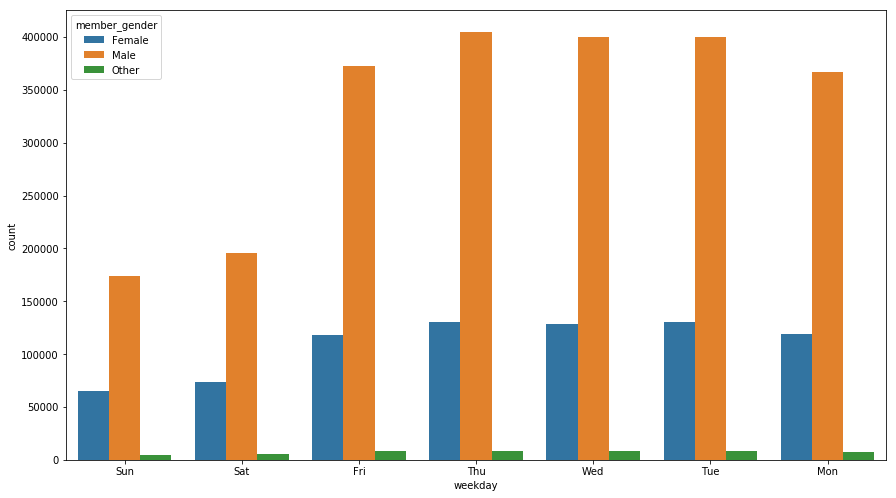

In [47]:
plt.figure(figsize=(14.70, 8.27))
sb.countplot(data = aa_dup, x = 'weekday', hue = 'member_gender');

from the above graph it can be observed that the usage of bike system is mainly done by males as stated above.in the above graph it is shown more clearly about the usage of bike system by different genders of people

**graph to show age distribution between the gender of the users**

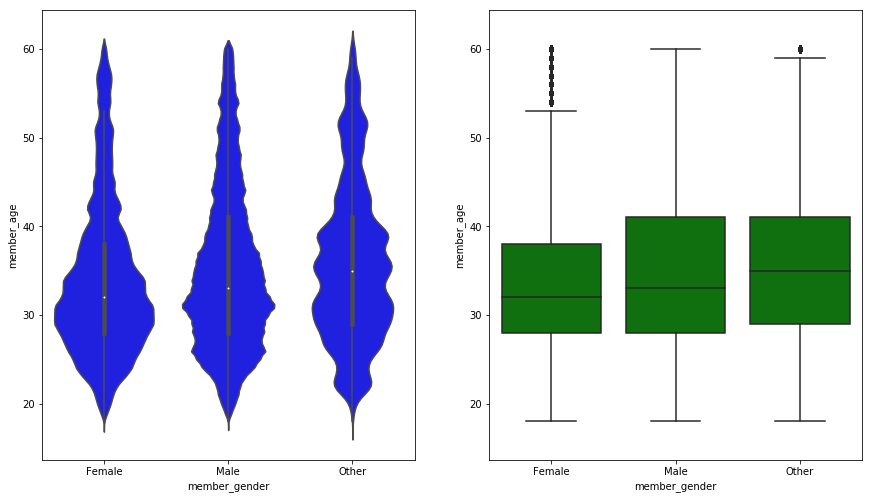

In [48]:
plt.figure(figsize=(14.70, 8.27))
base_color = sb.color_palette()[3]
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = aa_dup, x = 'member_gender', y = 'member_age', color = 'blue')
plt.subplot(1, 2, 2)
sb.boxplot(data = aa_dup, x = 'member_gender', y = 'member_age', color = 'green')
plt.ylim(ax1.get_ylim());

from the above graph it can be observed that the people using the bike share system have an age range of 20 to 40
  male:age is between 25 and 35(most of the users)
  female: age is between early 20's to late 30's
  other: age is between late 20's and early 40's  

**graph to show Trip Duration in Minutes**

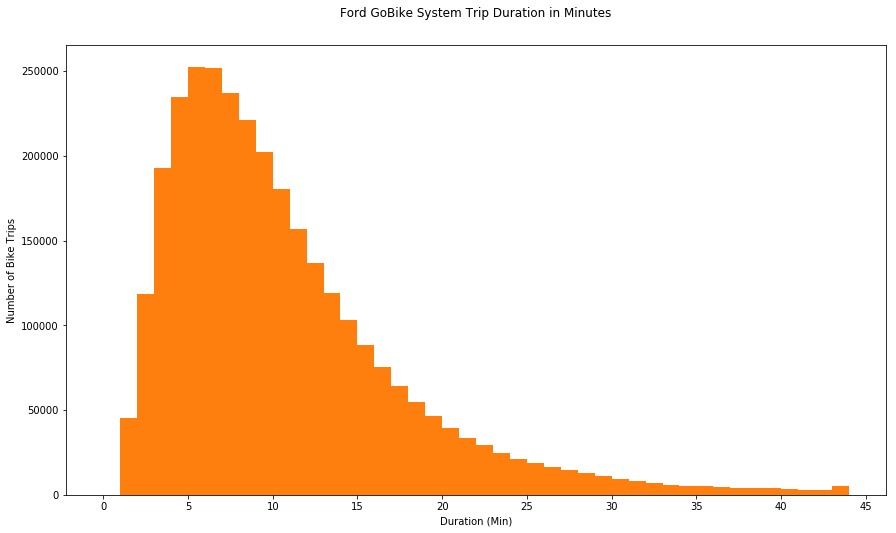

In [50]:
plt.figure(figsize=(14.70, 8.27))
bin_edges = np.arange(0, 45, 1) 
ticks = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45] 
labels = ['{}'.format(val) for val in ticks]
plt.hist(data = aa_dup, x = 'duration_min', bins = bin_edges)
sb.distplot(aa_dup['duration_min'], bins = bin_edges, kde = False, hist_kws = {'alpha' : 1});
plt.title("Ford GoBike System Trip Duration in Minutes", y=1.05) 
plt.xlabel('Duration (Min)') 
plt.xticks(ticks, labels) 
plt.ylabel('Number of Bike Trips');

from the above graph it can be observed that the max duration for which bikes are in use falls in the range of 5 min to 15 min

**graph to show System User by Age**

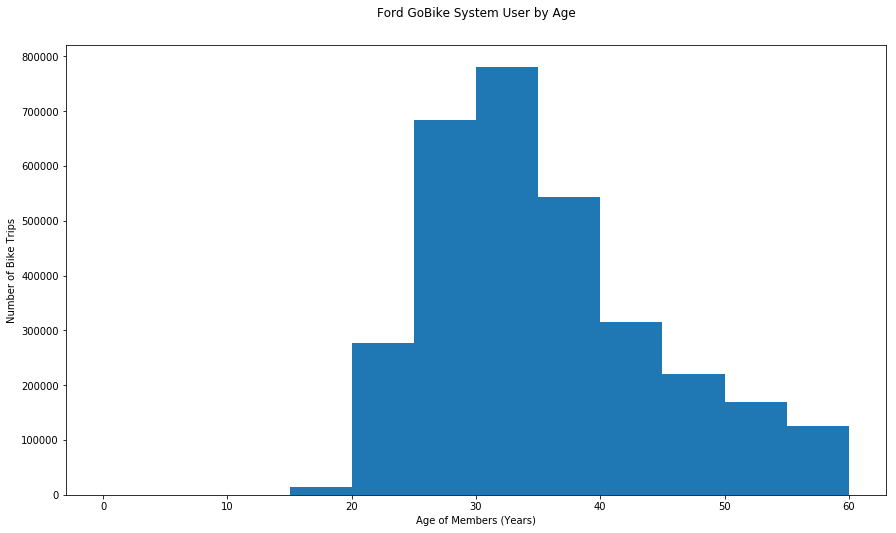

In [51]:
plt.figure(figsize=(14.70, 8.27))
bin_edges = np.arange(0, 65, 5)
plt.hist(data = aa_dup, x = 'member_age', bins = bin_edges);
plt.title("Ford GoBike System User by Age", y=1.05)
plt.xlabel('Age of Members (Years)')
plt.ylabel('Number of Bike Trips');

from the above graph it can be observed that the most number of bike trips are taken by the people of age between 25 and 40

**graph to show System Trends by User Type**

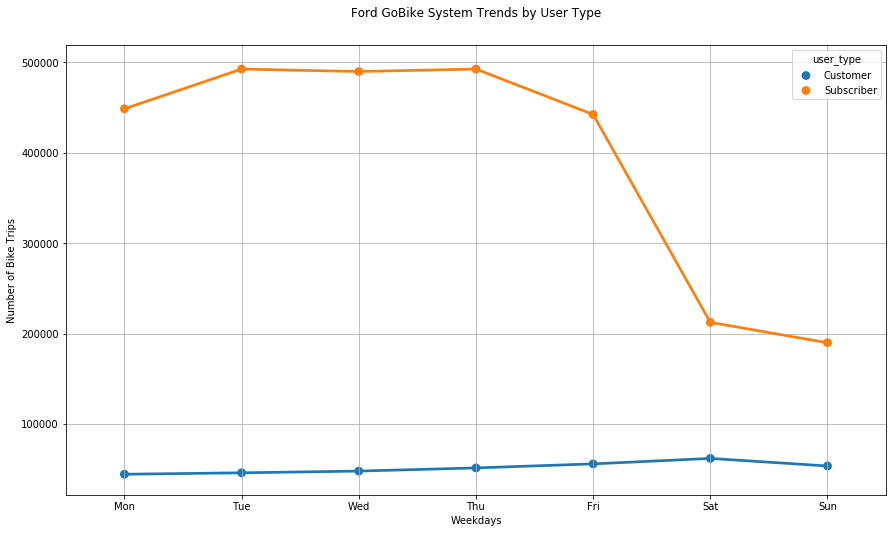

In [52]:
plt.figure(figsize=(14.70, 8.27))
aa_dup_user_week = aa_dup.groupby(['weekday', 'user_type']).size().reset_index() 
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax = sb.pointplot(data=aa_dup_user_week, x='weekday', y=0,hue = 'user_type',order = weekday)
plt.title('Ford GoBike System Trends by User Type', y=1.05) 
plt.xlabel('Weekdays') 
plt.ylabel('Number of Bike Trips') 
plt.grid();

from the above graph it can be observed that the number of bike trips is high on the weekday than the week ends and also the number of bike trips does'nt show much of a change for customers but it is slightly high on weekends than the weekdays 

**graph to show  Customers vs. Subscribers Duration (Min)**

<Figure size 1058.4x595.44 with 0 Axes>

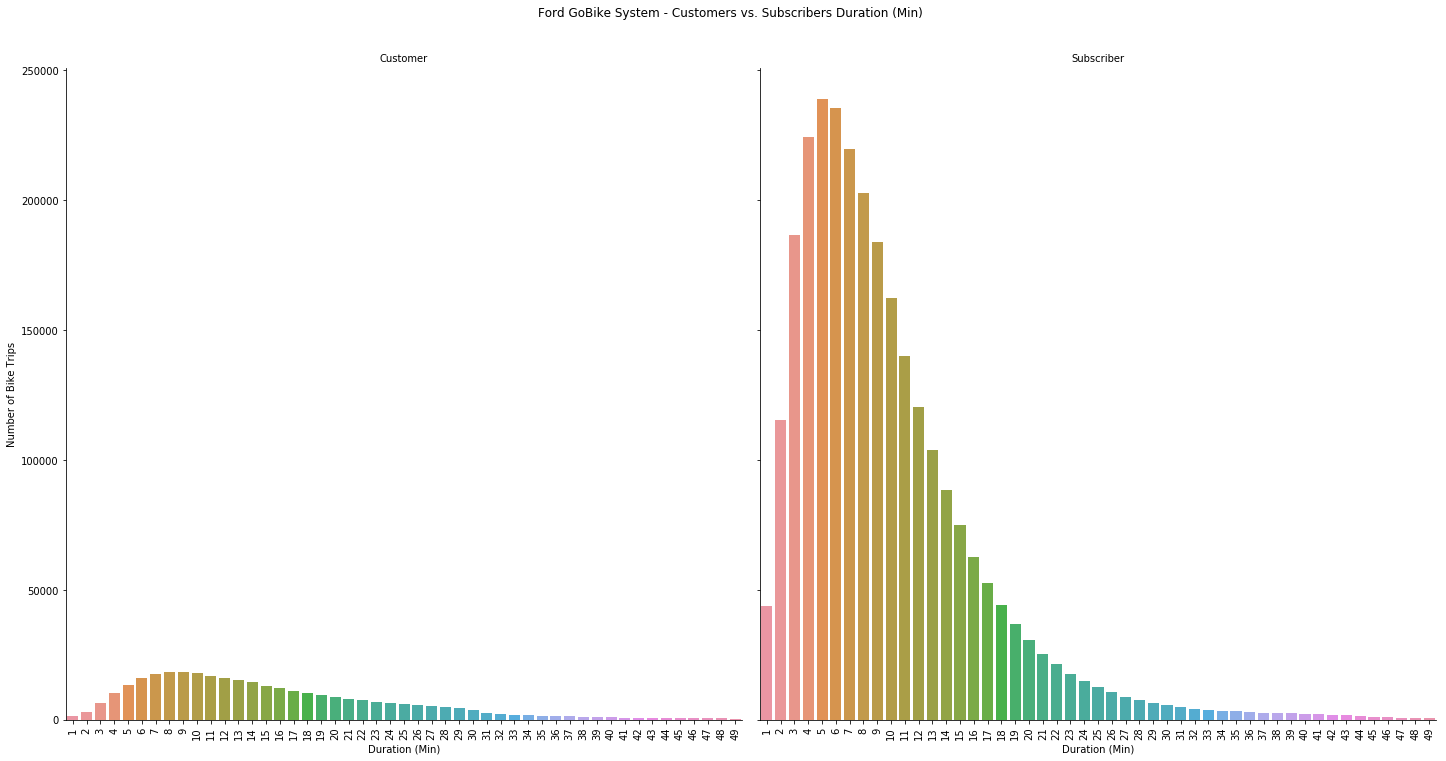

In [53]:
plt.figure(figsize=(14.70, 8.27))
data = aa_dup.query('duration_min < 50')
graph = sb.catplot(data=data, x = 'duration_min', col='user_type', kind='count',height=10)
graph.set_axis_labels('Duration (Min)', 'Number of Bike Trips') 
graph.set_titles('{col_name}')
graph.fig.suptitle('Ford GoBike System - Customers vs. Subscribers Duration (Min)', y=1.05)
graph.set_xticklabels(rotation=90);

from the above graph it can be observed that the duration of usage of bikes for customers is less when compared to the usage of the subscribers
subscribers: 5 min to 15 min
customers: 6 min to 10 min 

**graph to show Duration (Min) by User Type**

<Figure size 1058.4x595.44 with 0 Axes>

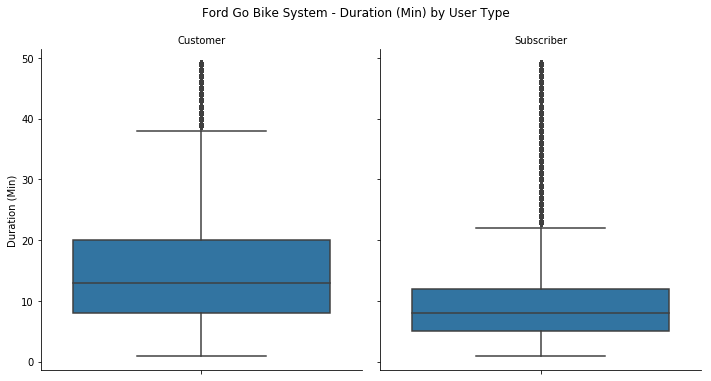

In [54]:
plt.figure(figsize=(14.70, 8.27))
data = aa_dup.query('duration_min < 50')
g = sb.catplot(data=data, y='duration_min', col="user_type", kind='box')
g.set_titles(col_template = '{col_name}') 
g.set_axis_labels("", "Duration (Min)") 
g.fig.suptitle('Ford Go Bike System - Duration (Min) by User Type', y=1.05);

from the above graph it can be observed that customers ride the bike for a longer duration than the subscribers

**graph to show Customers vs. Subscribers Ages**

<Figure size 1058.4x595.44 with 0 Axes>

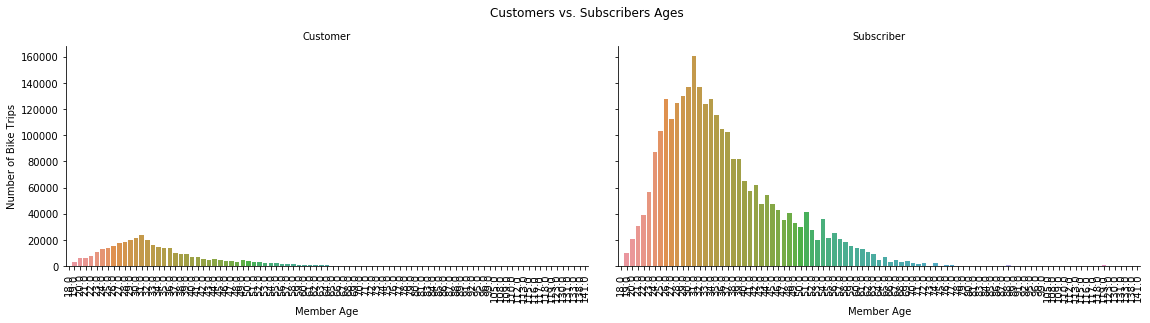

In [106]:
plt.figure(figsize=(14.70, 8.27))
graph = sb.catplot(data = aa_dup, x = 'member_age', col='user_type', kind='count',height=4, aspect = 2)
graph.set_axis_labels('Member Age', 'Number of Bike Trips') 
graph.set_titles('{col_name}')
graph.fig.suptitle('Customers vs. Subscribers Ages', y=1.05)
graph.set_xticklabels(rotation=90);

form the above graph it can be observed that the customers who use the bike more are little older than the subscribers

In [58]:
aa_dup['age'] = aa_dup['member_age'].apply(lambda x: '15 - 25' if 
                                                                   15<x<=25 
                                                               else 
                                                                   '26 - 35' 
                                                                       if 
                                                                           25<x<=35 
                                                                       else 
                                                                           '36 - 45' 
                                                                               if 
                                                                                   35<x<=45 
                                                                               else 
                                                                                   '46 - 55' 
                                                                                       if 
                                                                                           45<x<=55 
                                                                                       else 
                                                                                           '56 - 60' 
                                                                                               if 
                                                                                                   55<x<=60 
                                                                                               else x) 
aa_dup.age.value_counts()
subscriber_age = aa_dup[aa_dup['user_type'] == 'Subscriber'].groupby(['month', 'age']).agg({'bike_id':'count'}).reset_index()
customer_age = aa_dup[aa_dup['user_type'] == 'customer'].groupby(['month', 'age']).agg({'bike_id':'count'}).reset_index()

In [59]:
subscriber_age

month      age  bike_id
0       April  15 - 25    42661
1       April  26 - 35   143509
2       April  36 - 45    70966
3       April  46 - 55    32814
4       April  56 - 60     9340
5      August  15 - 25    22158
6      August  26 - 35    97050
7      August  36 - 45    56939
8      August  46 - 55    28102
9      August  56 - 60     7780
10   December  15 - 25    19744
11   December  26 - 35    81913
12   December  36 - 45    47390
13   December  46 - 55    23264
14   December  56 - 60     6578
15   February  15 - 25    34588
16   February  26 - 35   114482
17   February  36 - 45    58538
18   February  46 - 55    26649
19   February  56 - 60     7586
20    January  15 - 25    28385
21    January  26 - 35   112561
22    January  36 - 45    61759
23    January  46 - 55    28110
24    January  56 - 60     7809
25       July  15 - 25    24074
26       July  26 - 35    85989
27       July  36 - 45    47887
28       July  46 - 55    22004
29       July  56 - 60     6722
30       June  15 - 25    17389
31       June  26 - 35    73812
32       June  36 - 45    41474
33       June  46 - 55    18364
34       June  56 - 60     6075
35      March  15 - 25    44522
36      March  26 - 35   143281
37      March  36 - 45    70766
38      March  46 - 55    31566
39      March  56 - 60     9131
40        May  15 - 25    35828
41        May  26 - 35   139541
42        May  36 - 45    73356
43        May  46 - 55    34048
44        May  56 - 60     9711
45   November  15 - 25    22571
46   November  26 - 35    86589
47   November  36 - 45    49551
48   November  46 - 55    23756
49   November  56 - 60     6554
50    October  15 - 25    29696
51    October  26 - 35   116162
52    October  36 - 45    65762
53    October  46 - 55    31038
54    October  56 - 60     8885
55  September  15 - 25    24913
56  September  26 - 35   100448
57  September  36 - 45    58816
58  September  46 - 55    29014
59  September  56 - 60     8014

**graph to show Monthly Bike Trips Per Subscribers Age Group**

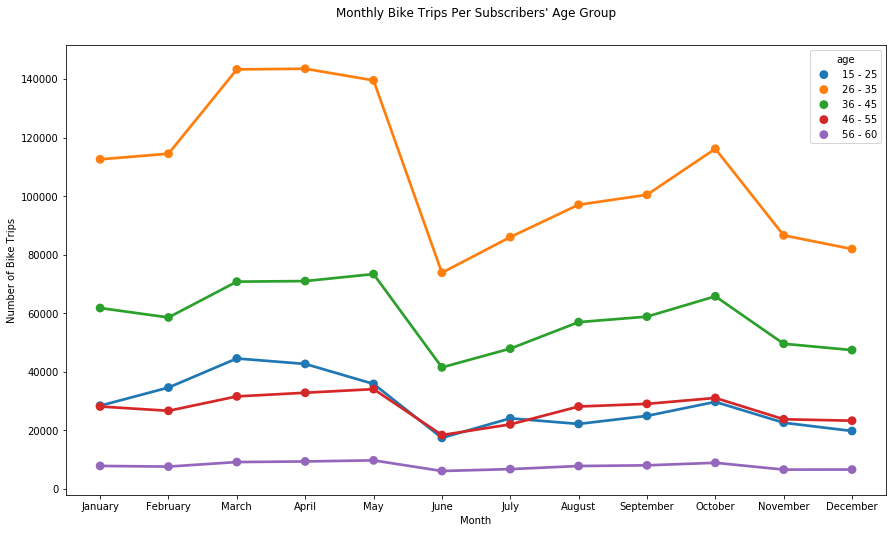

In [62]:
plt.figure(figsize=(14.70, 8.27))
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
ax = sb.pointplot(data = subscriber_age, x='month', y='bike_id', hue='age',order = months,height=5);
plt.xlabel('Month') 
plt.ylabel('Number of Bike Trips') 
plt.title("Monthly Bike Trips Per Subscribers' Age Group", y = 1.05);

from both the above graphs it can be observed the percenage use of bike system by both the subscriber and the customer throught out the year

**graph to show Monthly Usage Per User Type and Gender**

<Figure size 1058.4x595.44 with 0 Axes>

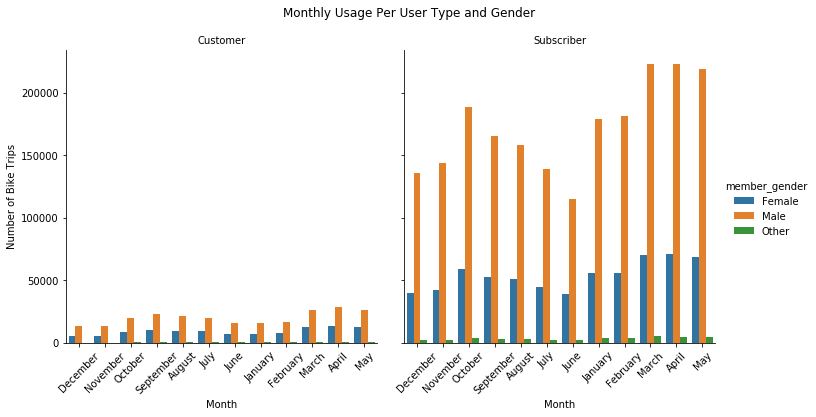

In [65]:
plt.figure(figsize=(14.70, 8.27))
graph = sb.catplot(data=aa_dup, x='month', col="user_type", hue="member_gender", kind='count',height=5)
graph.set_axis_labels("Month", "Number of Bike Trips") 
graph.set_titles("{col_name}")
graph.fig.suptitle('Monthly Usage Per User Type and Gender', y=1.05)
graph.set_xticklabels(rotation=45);

from both the above graphs it can be observed the number of bike trips taken by the people belonging to different gender and the user type  throught out the year

**graph to show Percentage of all bike rides per hour of the day**

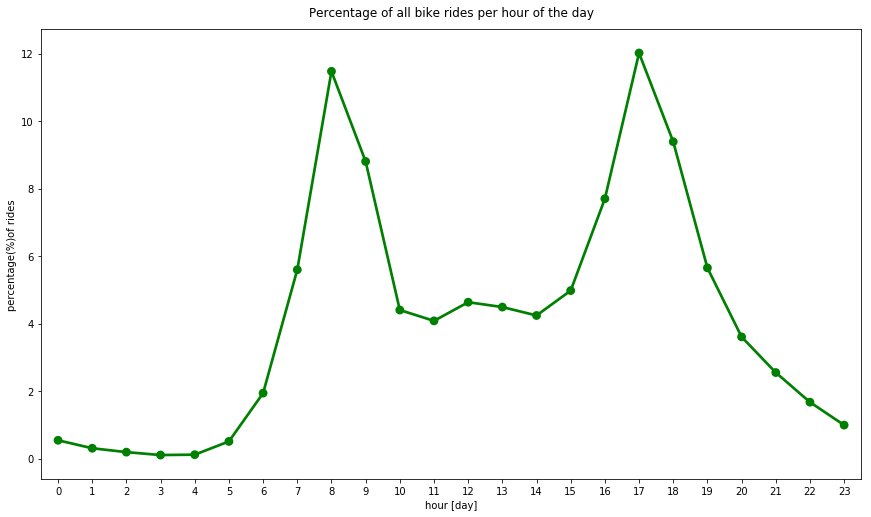

In [66]:
plt.figure(figsize=(14.70, 8.27))
trip_per_hour = aa_dup.groupby('hour').agg({'bike_id':'count'}).reset_index()
trip_per_hour['bike_id'] = (trip_per_hour['bike_id']/trip_per_hour['bike_id'].sum())*100
sb.pointplot(x='hour', y='bike_id',color='green',data=trip_per_hour) 
plt.title('Percentage of all bike rides per hour of the day',y=1.015) 
plt.xlabel('hour [day]')
plt.ylabel('percentage(%)of rides');

from the above graph it can be observed that the percentage of all bike rides per hour of the day is at the highest at 8 am and 5pm 

**graph to show gender vs user type**

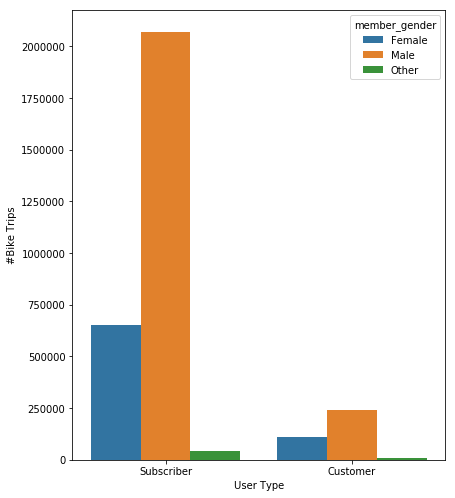

In [67]:
plt.figure(figsize=(14.70, 8.27))
plt.subplot(1, 2, 1)
oo = sb.countplot(data=aa_dup, x="user_type", hue="member_gender", order=aa_dup.user_type.value_counts().index) 
oo.set_xlabel('User Type') 
oo.set_ylabel('#Bike Trips');

from the above graph it can be seen that both in subscribers and customers usage of bike is done more by males tha females and others

**graph to show Monthly usage of the bike share system per user type and gender**

<Figure size 1058.4x595.44 with 0 Axes>

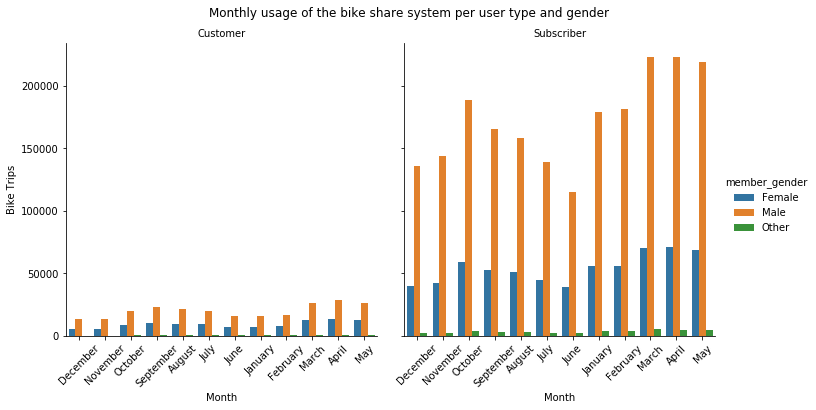

In [68]:
plt.figure(figsize=(14.70, 8.27))
zz = sb.catplot(data=aa_dup, x='month', col="user_type", hue="member_gender", kind='count') 
zz.set_axis_labels("Month", "Bike Trips")  
zz.set_titles("{col_name}") 
zz.fig.suptitle('Monthly usage of the bike share system per user type and gender', y=1.03) 
zz.set_xticklabels(rotation=45);

from the above graph it can be seen that both in subscribers and customers usage of bike is done more by males tha females and others through out the year

**graph to show Weekly usage of the bike share system per user type and gender**

<Figure size 1058.4x595.44 with 0 Axes>

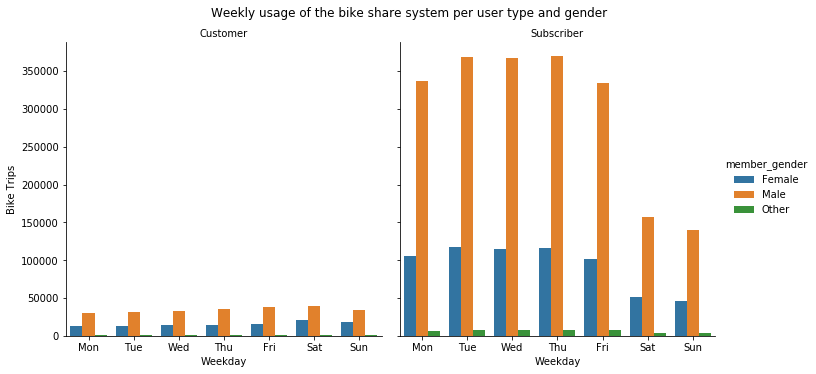

In [69]:
plt.figure(figsize=(14.70, 8.27))
weekday_lis = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'] 
xx = sb.catplot(data=aa_dup, x='weekday', col="user_type", hue='member_gender', kind='count',order = weekday_lis) 
xx.set_axis_labels("Weekday", "Bike Trips") 
xx.set_titles("{col_name}") 
xx.fig.suptitle('Weekly usage of the bike share system per user type and gender', y=1.03);

from the above graph it can be seen that both in subscribers and customers usage of bike is done more by males tha females and others through out the week

**graph to show Hourly usage of the bike share system per user type and gender**

<Figure size 1058.4x595.44 with 0 Axes>

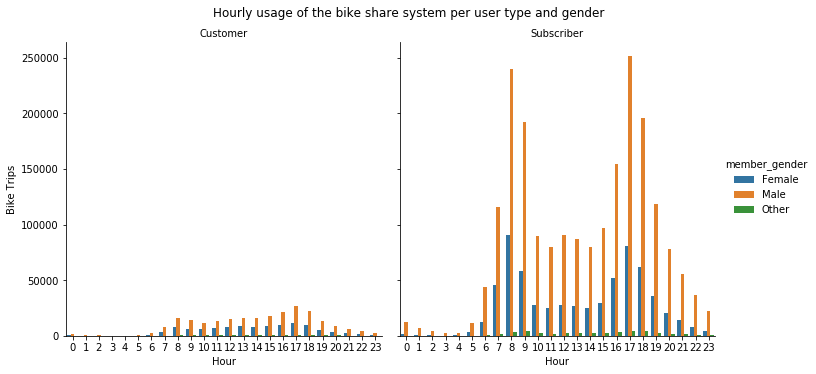

In [70]:
plt.figure(figsize=(14.70, 8.27))
cc= sb.catplot(data=aa_dup, x='hour', col="user_type", hue='member_gender', kind='count') 
cc.set_axis_labels("Hour", "Bike Trips") 
cc.set_titles("{col_name}") 
cc.fig.suptitle('Hourly usage of the bike share system per user type and gender', y=1.03);

from the above graph it can be seen that both in subscribers and customers usage of bike is done more by males tha females and others through out the day in the morning and in the evening


# Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>the variables of interest were the members age ,gender , duration and the usage of the bike system in a major city. the data types of some of the columns were changed to other datatypes which seemed appropriate for the analysis.the rows with nan values were removed  

# Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>Nothing seems out of the normal expectations for a bike sharing system in a major city. So far, the data reveals that the adults in the average working age range are the primary users of  the bike system, and they use these bikes regularly

# Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>Adding the user type to the analysis showed a different behavior of usage between the customers and subscribers. The data suggests that customers are casual riders such as tourists . This is accurate when we consider factoring in that Customer usage which increases on the weekends, and peaks during the month of July. the data suggests Subscribers are daily commuterss who use the system during weekdays when there is a better weather, and mostly for shorter distances. They mainly subscribers

# Were there any interesting or surprising interactions between features?

>Nothing out of the ordinary in the above visualisation

# conclusion

>as most of the users of the bike system are the subscribers the organisation must implement ideas and give something extra like discount reduction of prices for people who use the system more frequently. they must also maintain the good quality productsand the products must be durable.a customer service must also be available 24/7 to deal with the problems of the customers

In [ ]:
sources
udacity,python documentation,matplotlib documentation,seaborn documentation,pandas documentation,stackoverflow,wikipedia,google